In [1]:
import mxnet as mx
import gluoncv as gcv
import matplotlib.pyplot as plt

In [2]:
image_url = 'https://raw.githubusercontent.com/zhreshold/mxnet-ssd/master/data/demo/dog.jpg'
image_filepath = 'dog.jpg'
gcv.utils.download(url=image_url, path=image_filepath)

'dog.jpg'

In [3]:
image = mx.image.imread(image_filepath)
print('shape:', image.shape)
print('data type:', image.dtype)
print('minimun value:', image.min().asscalar())
print('maximum value:', image.max().asscalar())

shape: (576, 768, 3)
data type: <class 'numpy.uint8'>
minimun value: 0
maximum value: 255


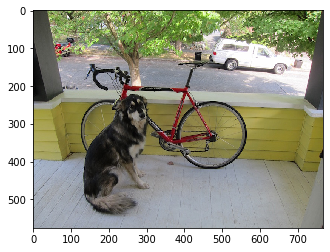

In [4]:
plt.imshow(image.asnumpy())

In [5]:
from mxnet.gluon.data.vision import transforms

transform_fn = transforms.Compose(
    [
        transforms.ToTensor(),
        transforms.Normalize([.485, .456, .406],[.299, .224, .225])
    ]
)

image = transform_fn(image)
print('shape:', image.shape)
print('data type:', image.dtype)
print('minimun value:', image.min().asscalar())
print('maximum value:', image.max().asscalar())

shape: (3, 576, 768)
data type: <class 'numpy.float32'>
minimun value: -2.0357141
maximum value: 2.64


In [6]:
image = image.expand_dims(0)
print(image.shape)

(1, 3, 576, 768)


In [7]:
network = gcv.model_zoo.get_model('fcn_resnet50_ade', pretrained = True)

57418KB [00:01, 48506.78KB/s]                           


128832KB [00:02, 57594.09KB/s]                            


In [8]:
! ls -sh /home/ec2-user/.mxnet/models/fcn_resnet50_ade-3479525a.params

136M /home/ec2-user/.mxnet/models/fcn_resnet50_ade-3479525a.params


In [16]:
output = network.demo(image)
output.shape

(1, 150, 576, 768)

In [17]:
output = output[0]
output.shape
# Number of classes
# Width
# Height

(150, 576, 768)

In [18]:
px_height, px_width = 300, 500

In [19]:
px_logit = output[:, px_height, px_width]

In [20]:
# Determining the classes for one particular pixel
px_probability = mx.nd.softmax(px_logit)
px_rounded_probability = mx.nd.round(px_probability*100)/100
print(px_rounded_probability)


[0.03 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.01 0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.91 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
<NDArray 150 @cpu(0)>


In [21]:
class_index = mx.nd.argmax(px_logit, axis=0)
class_index = class_index[0].astype('int').asscalar()
print(class_index)

127


In [22]:
from gluoncv.data.ade20k.segmentation import ADE20KSegmentation

class_label = ADE20KSegmentation.CLASSES[class_index]
print(class_label)

bicycle, bike, wheel, cycle


In [23]:
output_proba = mx.nd.softmax(output, axis=0)

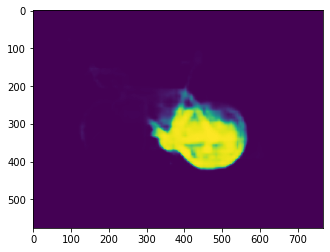

In [24]:
output_heatmap = output_proba[127]
plt.imshow(output_heatmap.asnumpy())

In [26]:
prediction = mx.nd.argmax(output, 0).asnumpy()
print(prediction.shape)

(576, 768)


In [27]:
print(prediction)

[[0. 0. 0. ... 4. 4. 4.]
 [0. 0. 0. ... 4. 4. 4.]
 [0. 0. 0. ... 4. 4. 4.]
 ...
 [3. 3. 3. ... 0. 0. 0.]
 [3. 3. 3. ... 0. 0. 0.]
 [3. 3. 3. ... 0. 0. 0.]]


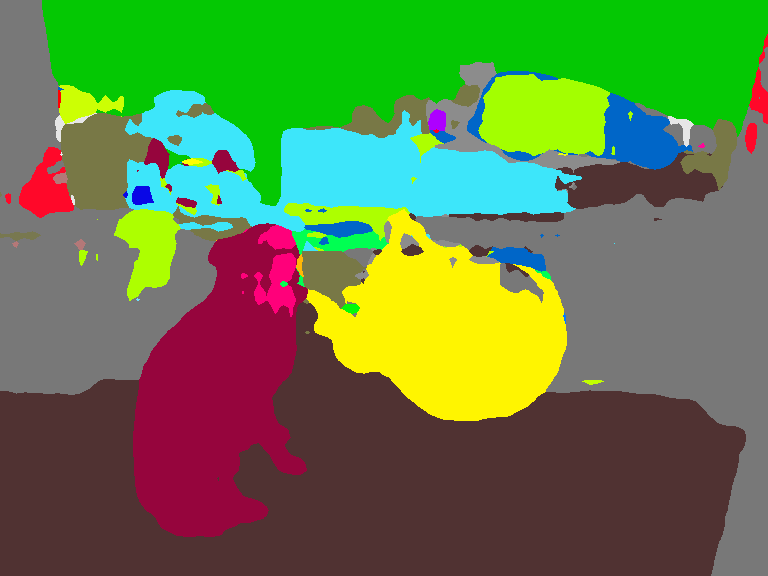

In [28]:
from gluoncv.utils.viz import get_color_pallete

prediction_image = get_color_pallete(prediction, 'ade20k')
prediction_image